In [1]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Imagen 3 Image Generation

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fgetting-started%2Fimagen3_image_generation.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/getting-started/imagen3_image_generation.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>            


| Author |
| --- |
| [Katie Nguyen](https://github.com/katiemn) |

## Overview

### Imagen 3

Imagen 3 on Vertex AI brings Google's state of the art generative AI capabilities to application developers. Imagen 3 is Google's highest quality text-to-image model to date. It's capable of creating images with astonishing detail. Thus, developers have more control when building next-generation AI products that transform their imagination into high quality visual assets. Learn more about [Imagen on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).


In this tutorial, you will learn how to use the Google Gen AI SDK for Python to interact with the Imagen 3 and Imagen 3 Fast models to generate images showcasing:

- Photorealistic scenes
- Prompt enhancement
- Text rendered within images
- Quality and latency comparisons within the two models

## Get started


### Install Google Gen AI SDK for Python


In [2]:
%pip install --upgrade --quiet google-genai

Note: you may need to restart the kernel to use updated packages.


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.


In [3]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [4]:
from google import genai
from google.genai import types

### Set Google Cloud project information and create client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [5]:
import os

PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

In [6]:
os.environ.get("GOOGLE_CLOUD_PROJECT")

'qwiklabs-gcp-04-de62f2be51eb'

In [7]:
PROJECT_ID

'qwiklabs-gcp-04-de62f2be51eb'

In [8]:
os.environ.get("GOOGLE_CLOUD_REGION")

'us-central1'

In [9]:
LOCATION

'us-central1'

In [10]:
client

### Define a helper function

In [11]:
import typing

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_image(
    image,
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
        
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)

### Load the image generation models

Imagen 3: `imagen-3.0-generate-002`

Imagen 3 Fast: `imagen-3.0-fast-generate-001`

In [12]:
generation_model = "imagen-3.0-generate-002"
generation_model_fast = "imagen-3.0-fast-generate-001"

### Imagen 3 & Imagen 3 Fast

With Imagen 3, you also have the option to use Imagen 3 Fast. These two model options give you the choice to optimize for quality and latency, depending on your use case.

**Imagen 3:** Generates high quality images with natural lighting and increased photorealism.

**Imagen 3 Fast:** Suitable for creating brighter images with a higher contrast. Overall, you can see a 40% decrease in latency in Imagen 3 Fast compared to Imagen 2.

With Imagen 3 and Imagen 3 Fast, you can also configure the `aspect ratio` to any of the following:
* 1:1
* 9:16
* 16:9
* 3:4
* 4:3

In [13]:
import matplotlib.pyplot as plt


### Add image watermark

By default, a digital watermark, or [SynthID](https://deepmind.google/technologies/synthid/), is added to Imagen 3 images. If you would like to explicitly set the watermark to True, you can do so with the `add_watermark` parameter. You can also [verify a watermarked image](https://cloud.google.com/vertex-ai/generative-ai/docs/image/generate-images#watermark).

A whimsical, brightly lit store filled with stacks of colorful halva blocks, each with a unique pattern and texture, alongside shelves overflowing with vibrant shuk candies in various shapes and colors. A display case shows a close-up of intricately designed halva and shuk candy,  with the warm light highlighting the glossy surface of the halva and the sugary texture of the shuk candy. The store is filled with the sweet smell of these treats, decorated with swirls of pastel colors and intricate patterns. It is a charming storefront that has a sense of being handmade and handcrafted, decorated with an ornate sign that says 'Halva & Shuk Candy'. The store is bustling with customers of all ages and ethnicities, with a general sense of joy and delight captured in this photo, a visual representation of a cheerful and inviting atmosphere.


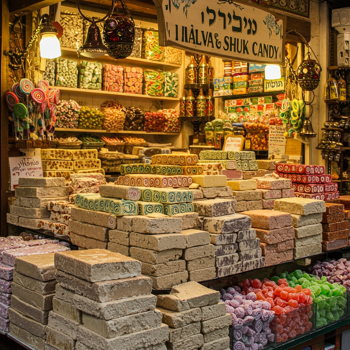

In [14]:
prompt = """
a whimsical halva (a middle eastern confectionery which appears as a ROUND block) and shuk candy (gummy candy) store
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
        add_watermark=True,
    ),
)

# Print the enhanced prompt
print(image.generated_images[0].enhanced_prompt)
display_image(image.generated_images[0].image)

A whimsical, brightly colored storefront featuring a mountain of halva, a Middle Eastern confectionery that resembles a round block, and a vast array of colorful shuk candy (gummy candy). The store has a playful, almost cartoonish style, with swirling lines and vibrant colors adorning the facade and windows. The storefront is adorned with whimsical, handcrafted decorations of gummy bears, lollipops, and other sweet treats.  The colors are vibrant and eye-catching, with a warm, inviting atmosphere. This fantastical scene invites the viewer to imagine the exciting variety of flavors and textures waiting inside. A wide angle shot captures the entire storefront, from the street perspective, showcasing the whimsical scene.


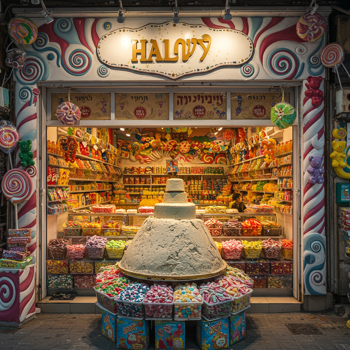

In [15]:
prompt = """
a whimsical halva (a middle eastern confectionery which appears as a round block) and shuk candy (gummy candy) store
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
        add_watermark=True,
    ),
)

# Print the enhanced prompt
print(image.generated_images[0].enhanced_prompt)
display_image(image.generated_images[0].image)

A whimsical, brightly colored storefront showcasing a delightful array of halva, a Middle Eastern confectionery presented in various round block shapes and flavors, and a wide selection of shuk candies in an array of gummy shapes and colors. The shop is overflowing with whimsical displays and decorative elements, creating a sense of childlike wonder. The lighting is warm and inviting, highlighting the rich colors and textures of the candies. A wide-angle shot, capturing a vibrant, eye-catching image, the store front is decorated with strings of fairy lights. Everything is arranged with delightful creativity, suggesting a celebration of sweetness and imagination. A playful, quirky, and whimsical illustration style.


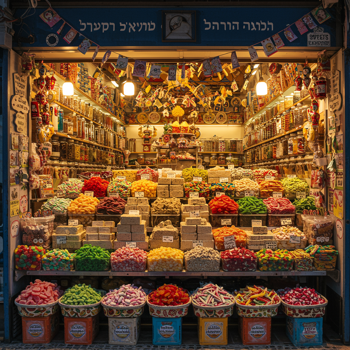

In [16]:
prompt = """
a whimsical halva (a middle eastern confectionery which appears as a ROUND block) and shuk candy (gummy candy) store
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
        add_watermark=True,
    ),
)

# Print the enhanced prompt
print(image.generated_images[0].enhanced_prompt)
display_image(image.generated_images[0].image)

A whimsical halva and shuk candy store, bursting with vibrant colors and playful designs. The store front is adorned with intricate sugar decorations, creating a sense of wonder and delight for visitors. Glass display cases are filled with an array of colorful halva blocks in various flavors, each one a miniature masterpiece. Shuk candies are arranged in rainbow-like formations, creating an explosion of sugary sweetness. The storefront is illuminated with strings of fairy lights and colorful banners, contributing to the festive and cheerful atmosphere. The overall impression is one of vibrant energy, with the store embodying the joy and creativity of candy making. A wide angle shot captures the entire store, showcasing the playful atmosphere and abundance of sweets. It's designed to capture the charm and allure of this whimsical candy shop in a professional, high quality photograph.


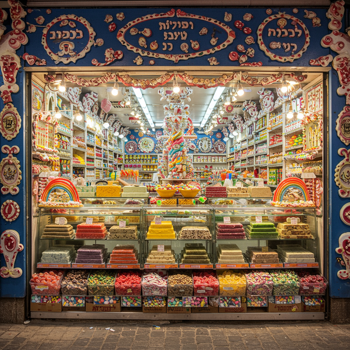

In [18]:
prompt = """
a whimsical halva (a middle eastern confectionery which appears as CAKE-SHAPED block) and shuk candy (gummy candy) store
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
        add_watermark=True,
    ),
)

# Print the enhanced prompt
print(image.generated_images[0].enhanced_prompt)
display_image(image.generated_images[0].image)

A whimsical halva and shuk candy store, bursting with vibrant colors and playful designs. The store's facade features a towering, cake-like block of halva, decorated with colorful sprinkles and whimsical swirls. Shelves are overflowing with various shapes and colors of shuk candy, including gummy bears and worms in rainbow hues. The store's interior is a kaleidoscope of pastel colors, with displays of halva in unique shapes, such as hearts and stars. The store's lighting is warm and inviting, casting a soft glow over the sugary delights. It's a charming and inviting space where customers of all ages can indulge in the sweetness of traditional sweets. A wide angle shot of a well-lit storefront with a vintage-inspired sign, using 19th century oil paint style.


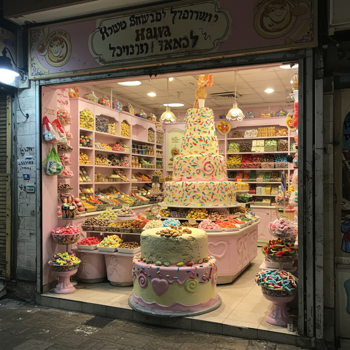

In [19]:
prompt = """
a whimsical halva (a middle eastern confectionery which appears as cake-shaped block) and shuk candy (gummy candy) store
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
        add_watermark=True,
    ),
)

# Print the enhanced prompt
print(image.generated_images[0].enhanced_prompt)
display_image(image.generated_images[0].image)

A photorealistic image of a whimsical halva and shuk candy store, bursting with vibrant colors and textures. The storefront is adorned with intricate, swirling patterns reminiscent of Arabic calligraphy, creating a sense of playful elegance. Inside, a diverse array of halva blocks are stacked in a colorful pyramid. The blocks are in shades of gold, beige, and caramel, and some are topped with edible gold leaf or sprinkled with pistachios. Each block has a unique texture and pattern, enticing the viewer. Jars of colorful shuk candies line the walls, each jar gleaming with a different variety of bright, gummy shapes. Some shuk candies are in the shapes of traditional middle eastern sweets, while others feature playful and quirky shapes. The lighting is warm and inviting, with a gentle glow emanating from the display cases and soft, ambient lighting illuminating the store's interior. The entire scene is captured with a Canon EOS R5 camera with a shallow depth of field, ensuring that the c

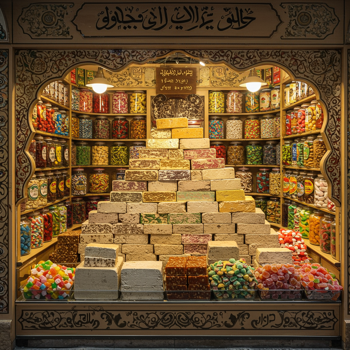

In [20]:
prompt = """
a photorealistic image of a whimsical halva (a middle eastern confectionery which appears as cake-shaped block) and shuk candy (gummy candy) store
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
        add_watermark=True,
    ),
)

# Print the enhanced prompt
print(image.generated_images[0].enhanced_prompt)
display_image(image.generated_images[0].image)

A photorealistic image of a whimsical halva and shuk candy store, bursting with vibrant colors and textures. The storefront is adorned with intricate, swirling patterns reminiscent of traditional Middle Eastern architecture. Inside, shelves overflow with colorful blocks of halva in a variety of flavors, pistachio, sunflower, chocolate and sesame, each one meticulously crafted and displayed with an almost artistic sensibility. The store is filled with playful, gummy candies like shuk candies, shaped like animals, flowers, and other whimsical designs. The lighting is warm and inviting, creating a sense of cozy delight. The overall style evokes a sense of wonder and nostalgia, suggesting a place where traditional treats are reimagined with playful creativity, possibly a family owned shop, a vintage display of old-fashioned sweets and vibrant candy colors, that inspires a sense of childhood joy and sweet indulgence.


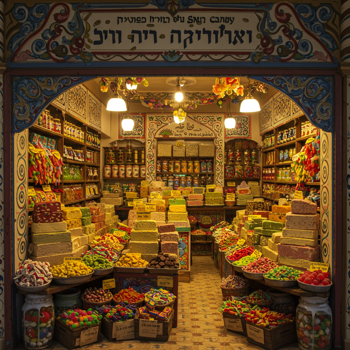

In [21]:
prompt = """
a photorealistic image of a whimsical halva (a middle eastern confectionery which appears as cake-shaped block) and shuk candy (gummy candy) store
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
        add_watermark=True,
    ),
)

# Print the enhanced prompt
print(image.generated_images[0].enhanced_prompt)
display_image(image.generated_images[0].image)

In [ ]:
prompt = """
a photorealistic image of a whimsical halva (a middle eastern confectionery which appears as cake-shaped block) and shuk candy (gummy candy) store
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
        add_watermark=True,
    ),
)

# Print the enhanced prompt
print(image.generated_images[0].enhanced_prompt)
display_image(image.generated_images[0].image)

In [ ]:
image

In [ ]:
image.generated_images

In [ ]:
# verify-watermark
# https://cloud.google.com/vertex-ai/generative-ai/docs/image/verify-watermark
# GO TO https://console.cloud.google.com/vertex-ai/studio/media/generate;tab=image
# UPLOAD UR IMG
# check if
#       SynthID detecting...
#       SynthID detected
